In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Load data from Excel file
file_path = 'C:/Users/User/OneDrive/Έγγραφα/public_data/ΟΠΑ data final.xlsx'

# Load each sheet into separate DataFrames
receipts_df = pd.read_excel(file_path, sheet_name='Receipts')
visitors_df = pd.read_excel(file_path, sheet_name='Visitors')
schedule_df = pd.read_excel(file_path, sheet_name='Schedule')


# Standardize column names for consistency
receipts_df.columns = receipts_df.columns.str.lower()
visitors_df.columns = visitors_df.columns.str.lower()
schedule_df.columns = schedule_df.columns.str.lower()

# Display the first few rows of each DataFrame to inspect the data
print("Receipts Data:")
print(receipts_df.head())
print("\nVisitors Data:")
print(visitors_df.head())
print("\nSchedule Data:")
print(schedule_df.head())

Receipts Data:
   store  receipts  hour       date
0   6762        69    18 2024-03-09
1   8741        18    14 2024-02-26
2   8741        35    11 2024-04-30
3   6762        48    21 2024-01-05
4   7331        34    16 2024-04-13

Visitors Data:
   store       date  hour  visitors
0   7498 2024-02-11    20         0
1   7498 2024-04-09     8         0
2   7498 2024-09-02    22         0
3   7498 2024-10-21    21         0
4   7331 2024-07-25    15        33

Schedule Data:
        date     start       end  store  employee id
0 2024-01-03  09:00:00  17:00:00   7498         1001
1 2024-01-04  09:00:00  17:00:00   7498         1001
2 2024-01-05  13:00:00  21:00:00   7498         1001
3 2024-01-08  13:00:00  21:00:00   7498         1001
4 2024-01-09  13:00:00  21:00:00   7498         1001


In [3]:
# Standardize column names for consistency
schedule_df.columns = schedule_df.columns.str.lower()

# Convert date columns to datetime format
schedule_df['date'] = pd.to_datetime(schedule_df['date'])
visitors_df['date'] = pd.to_datetime(visitors_df['date'])

# Combine date and time columns to create full datetime objects
schedule_df['start_datetime'] = pd.to_datetime(schedule_df['date'].astype(str) + ' ' + schedule_df['start'].astype(str))
schedule_df['end_datetime'] = pd.to_datetime(schedule_df['date'].astype(str) + ' ' + schedule_df['end'].astype(str))

# Calculate the duration of each shift in hours
schedule_df['shift_duration'] = (schedule_df['end_datetime'] - schedule_df['start_datetime']).dt.total_seconds() / 3600

store
6762    104305
7331    122372
7498    223964
8741    135916
Name: receipts, dtype: int64
hour
7     20.178571
8      6.852459
9     10.064478
10    21.049625
11    34.829246
12    45.011649
13    48.269402
14    48.838393
15    43.273619
16    40.200000
17    44.872531
18    53.208969
19    62.605381
20    56.636856
21    19.955867
22     7.571429
Name: receipts, dtype: float64


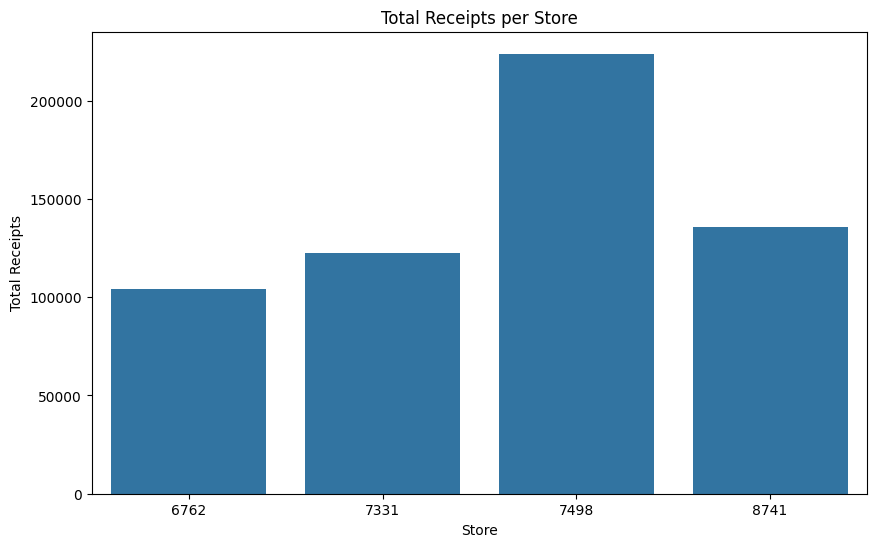

In [6]:
total_receipts_per_store = receipts_df.groupby('store')['receipts'].sum()
print(total_receipts_per_store)
avg_receipts_per_hour = receipts_df.groupby('hour')['receipts'].mean()
print(avg_receipts_per_hour)

plt.figure(figsize=(10, 6))
sns.barplot(x=total_receipts_per_store.index, y=total_receipts_per_store.values)
plt.title('Total Receipts per Store')
plt.xlabel('Store')
plt.ylabel('Total Receipts')
plt.show()

hour
7     20.178571
8      6.852459
9     10.064478
10    21.049625
11    34.829246
12    45.011649
13    48.269402
14    48.838393
15    43.273619
16    40.200000
17    44.872531
18    53.208969
19    62.605381
20    56.636856
21    19.955867
22     7.571429
Name: receipts, dtype: float64
hour
7          7
8         15
9      35562
10     89485
11    141929
12    176787
13    176607
14    162974
15    150314
16    152418
17    173055
18    220150
19    253022
20    148277
21         0
22         0
Name: visitors, dtype: int64


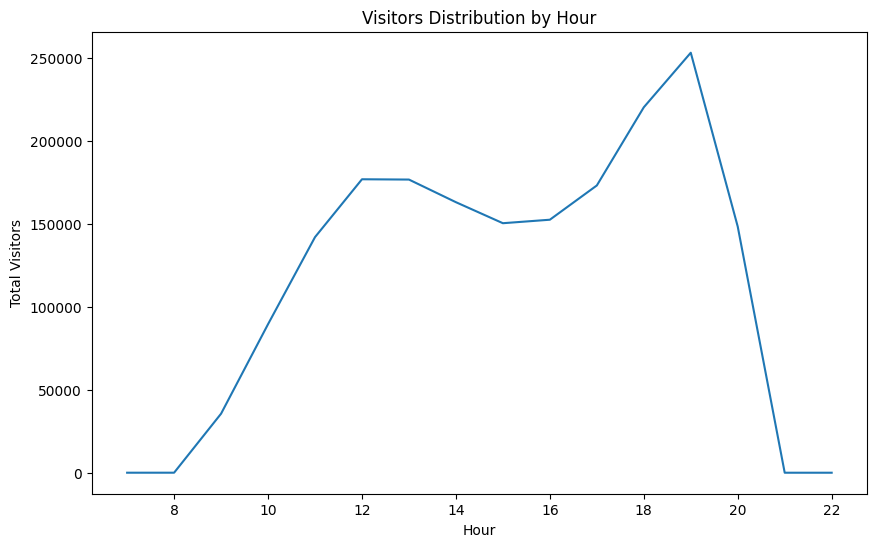

In [7]:
avg_receipts_per_hour = receipts_df.groupby('hour')['receipts'].mean()
print(avg_receipts_per_hour)
visitors_by_hour = visitors_df.groupby('hour')['visitors'].sum()
print(visitors_by_hour)

plt.figure(figsize=(10, 6))
sns.lineplot(x=visitors_by_hour.index, y=visitors_by_hour.values)
plt.title('Visitors Distribution by Hour')
plt.xlabel('Hour')
plt.ylabel('Total Visitors')
plt.show()

employee id
1001          206
5177          205
6766          203
10549         216
10770         194
             ... 
3497960029      8
3497960060      5
3497960064      5
3497960067      5
3497960151      5
Length: 246, dtype: int64
Average shift duration: 6.9015722024045445 hours


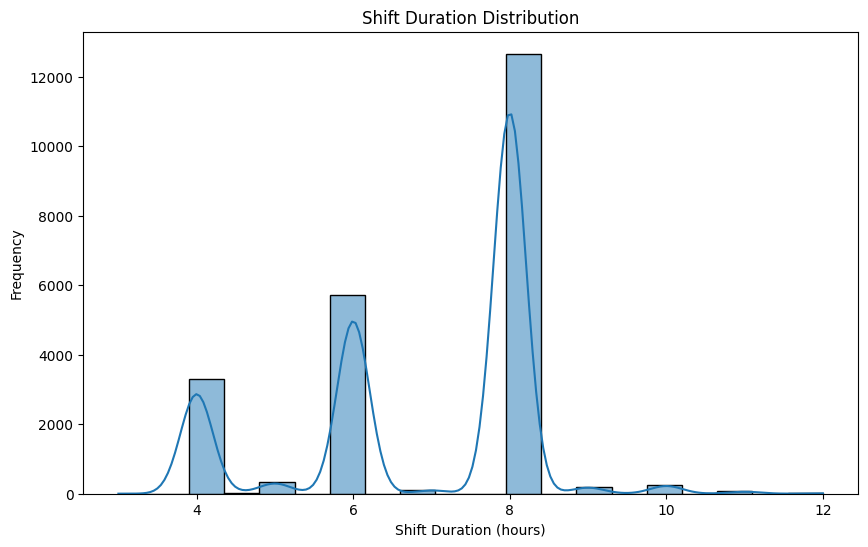

In [9]:
shifts_per_employee = schedule_df.groupby('employee id').size()
print(shifts_per_employee)
avg_shift_duration = schedule_df['shift_duration'].mean()
print(f"Average shift duration: {avg_shift_duration} hours")

plt.figure(figsize=(10, 6))
sns.histplot(schedule_df['shift_duration'], bins=20, kde=True)
plt.title('Shift Duration Distribution')
plt.xlabel('Shift Duration (hours)')
plt.ylabel('Frequency')
plt.show()

Understuff/ Overstuff

In [12]:
visitors_7331 = visitors_df[visitors_df['store'] == 7331]
schedule_7331 = schedule_df[schedule_df['store'] == 7331]
daily_visitors_7331 = visitors_7331.groupby('date')['visitors'].sum().reset_index()
daily_staffing_7331 = schedule_7331.groupby('date')['employee id'].nunique().reset_index()
daily_staffing_7331.rename(columns={'employee id': 'employees_scheduled'}, inplace=True)
staffing_vs_visitors_7331 = pd.merge(daily_visitors_7331, daily_staffing_7331, on='date', how='inner')

# Calculate visitors per employee
staffing_vs_visitors_7331['visitors_per_employee'] = staffing_vs_visitors_7331['visitors'] / staffing_vs_visitors_7331['employees_scheduled']

# Calculate average visitors per employee
threshold = staffing_vs_visitors_7331['visitors_per_employee'].mean()
print(f"Average visitors per employee for store 7331: {threshold:.2f}")

Average visitors per employee for store 7331: 82.17


In [13]:
daily_visitors_all_stores = visitors_df.groupby(['store', 'date'])['visitors'].sum().reset_index()
daily_staffing_all_stores = schedule_df.groupby(['store', 'date'])['employee id'].nunique().reset_index()
daily_staffing_all_stores.rename(columns={'employee id': 'employees_scheduled'}, inplace=True)
staffing_vs_visitors_all_stores = pd.merge(daily_visitors_all_stores, daily_staffing_all_stores, on=['store', 'date'], how='inner')
staffing_vs_visitors_all_stores['visitors_per_employee'] = (
    staffing_vs_visitors_all_stores['visitors'] / staffing_vs_visitors_all_stores['employees_scheduled']
)


#Calculate average visitors per employee for each store
average_visitors_per_employee_by_store = (
    staffing_vs_visitors_all_stores.groupby('store')['visitors_per_employee'].mean().reset_index()
)
average_visitors_per_employee_by_store.rename(columns={'visitors_per_employee': 'average_visitors_per_employee'}, inplace=True)

print(average_visitors_per_employee_by_store)

   store  average_visitors_per_employee
0   6762                      52.136141
1   7331                      82.170682
2   7498                     105.374938
3   8741                      96.744888


   store  average_visitors_per_employee     staffing_status
0   6762                      52.136141        Understaffed
1   7331                      82.170682  Adequately Staffed
2   7498                     105.374938         Overstaffed
3   8741                      96.744888         Overstaffed


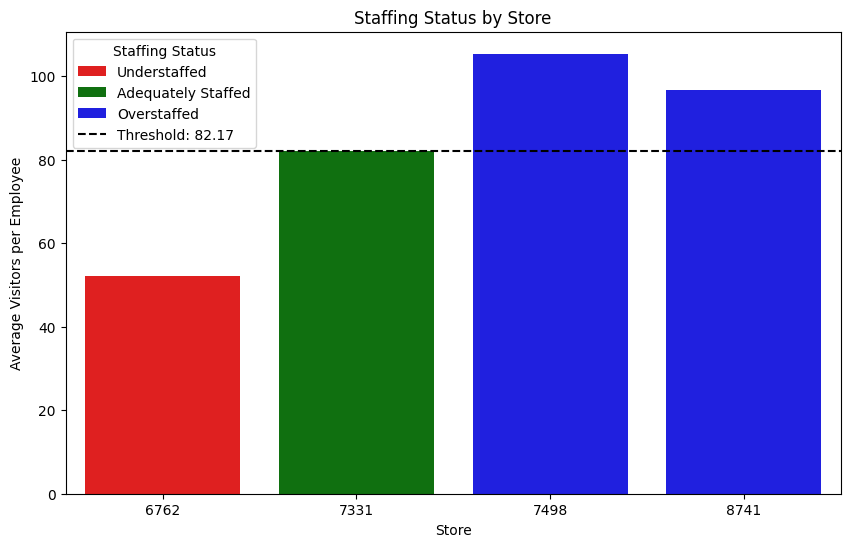

In [29]:
# Define a small tolerance for floating-point comparison
tolerance = 0.0001

# Classify staffing status with a tolerance for "Adequately Staffed"
average_visitors_per_employee_by_store['staffing_status'] = np.where(
    abs(average_visitors_per_employee_by_store['average_visitors_per_employee'] - threshold) < tolerance,
    'Adequately Staffed',
    np.where(
        average_visitors_per_employee_by_store['average_visitors_per_employee'] < threshold,
        'Understaffed',
        'Overstaffed'
    )
)

# Display the result
print(average_visitors_per_employee_by_store)

plt.figure(figsize=(10, 6))
sns.barplot(data=average_visitors_per_employee_by_store, x='store', y='average_visitors_per_employee', hue='staffing_status', palette={'Understaffed': 'red', 'Overstaffed': 'blue', 'Adequately Staffed': 'green'})
plt.axhline(y=threshold, color='black', linestyle='--', label=f'Threshold: {threshold:.2f}')
plt.title('Staffing Status by Store')
plt.xlabel('Store')
plt.ylabel('Average Visitors per Employee')
plt.legend(title='Staffing Status')
plt.show()

Seasonality

In [31]:
# Convert 'start_datetime' and 'end_datetime' to datetime if not already done
schedule_df['start_datetime'] = pd.to_datetime(schedule_df['start_datetime'])
schedule_df['end_datetime'] = pd.to_datetime(schedule_df['end_datetime'])
schedule_df['month'] = schedule_df['date'].dt.month
employee_month_counts = schedule_df.groupby('employee id')['month'].nunique()
#print(employee_month_counts)

employee_month_counts = schedule_df.groupby('employee id')['month'].nunique().reset_index()
employee_month_counts.rename(columns={'month': 'months_worked'}, inplace=True)

# Display the result
print(employee_month_counts.head())

   employee id  months_worked
0         1001             11
1         5177             11
2         6766             11
3        10549             11
4        10770             11


In [38]:
# Define the threshold for seasonal employees (e.g., 3 months)
seasonal_threshold = 3

# Classify employees as seasonal or non-seasonal
employee_month_counts['employee_type'] = np.where(
    employee_month_counts['months_worked'] <= seasonal_threshold,
    'Seasonal',
    'Non-Seasonal'
)

# Display the result
print(employee_month_counts.head())

   employee id  months_worked employee_type
0         1001             11  Non-Seasonal
1         5177             11  Non-Seasonal
2         6766             11  Non-Seasonal
3        10549             11  Non-Seasonal
4        10770             11  Non-Seasonal


In [36]:
employee_type_counts = employee_month_counts['employee_type'].value_counts()
print(employee_type_counts)

employee_type
Non-Seasonal    223
Seasonal         23
Name: count, dtype: int64


C:\Users\User\AppData\Local\Temp\ipykernel_14060\1867402893.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=employee_month_counts, x='employee_type', order=['Seasonal', 'Non-Seasonal'], palette={'Seasonal': 'orange', 'Non-Seasonal': 'blue'})


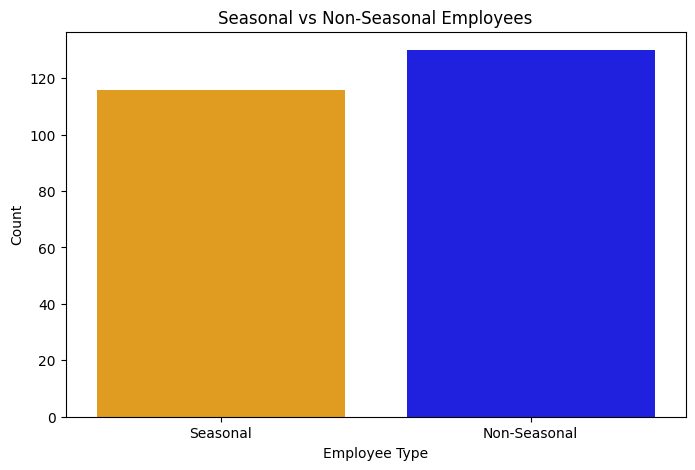

In [39]:
plt.figure(figsize=(8, 5))
sns.countplot(data=employee_month_counts, x='employee_type', order=['Seasonal', 'Non-Seasonal'], palette={'Seasonal': 'orange', 'Non-Seasonal': 'blue'})
plt.title('Seasonal vs Non-Seasonal Employees')
plt.xlabel('Employee Type')
plt.ylabel('Count')
plt.show()

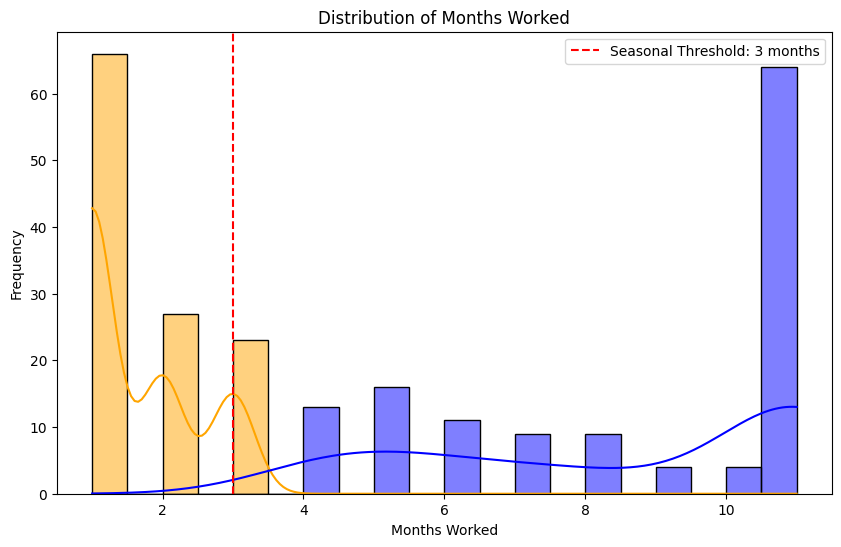

In [40]:
plt.figure(figsize=(10, 6))
sns.histplot(data=employee_month_counts, x='months_worked', bins=20, kde=True, hue='employee_type', palette={'Seasonal': 'orange', 'Non-Seasonal': 'blue'})
plt.axvline(x=seasonal_threshold, color='red', linestyle='--', label=f'Seasonal Threshold: {seasonal_threshold} months')
plt.title('Distribution of Months Worked')
plt.xlabel('Months Worked')
plt.ylabel('Frequency')
plt.legend()
plt.show()

mhnas paraitiseon 

In [41]:
# Group by employee id and find the last month they worked
employee_last_month = schedule_df.groupby('employee id')['month'].max().reset_index()
employee_last_month.rename(columns={'month': 'last_month_worked'}, inplace=True)
print(employee_last_month.head())

   employee id  last_month_worked
0         1001                 11
1         5177                 11
2         6766                 11
3        10549                 11
4        10770                 11


In [42]:
# Count the number of employees who stopped working in each month
monthly_departures = employee_last_month['last_month_worked'].value_counts().sort_index().reset_index()
monthly_departures.columns = ['month', 'num_departures']

# Display the result
print(monthly_departures)

    month  num_departures
0       1              17
1       2               7
2       3               9
3       4               6
4       5               9
5       6               8
6       7              10
7       8              11
8       9              19
9      10               6
10     11             144


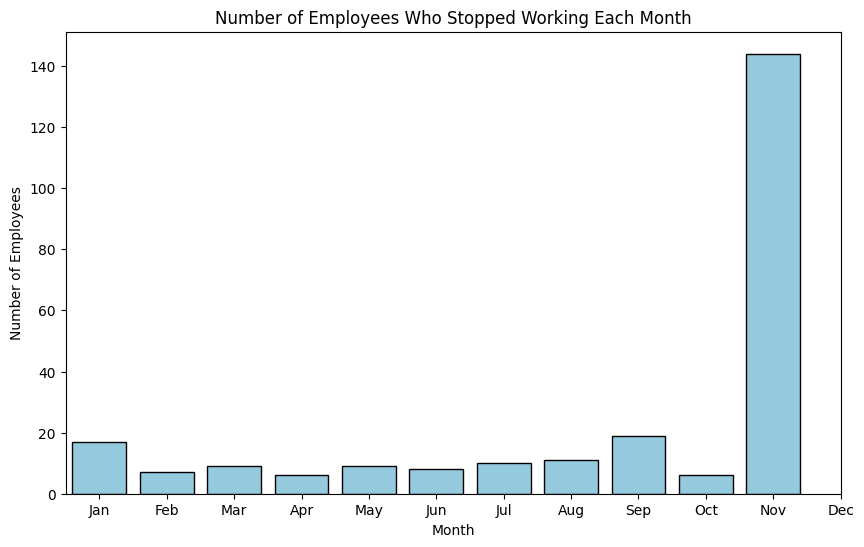

In [55]:
import calendar

# Create a list of abbreviated month names
month_names = [calendar.month_abbr[i] for i in range(1, 13)]

# Plot the bar plot with abbreviated month names
plt.figure(figsize=(10, 6))
sns.barplot(data=monthly_departures, x='month', y='num_departures', color='skyblue', edgecolor='black')
plt.title('Number of Employees Who Stopped Working Each Month')
plt.xlabel('Month')
plt.ylabel('Number of Employees')
plt.xticks(ticks=range(12), labels=month_names)  # Use abbreviated month names
plt.show()

In [47]:
# Filter employees who left in Month 9
employees_left_month_9 = employee_last_month[employee_last_month['last_month_worked'] == 9]
#print(employees_left_month_9.head())

months_worked_by_month_9_leavers = (
    schedule_df[schedule_df['employee id'].isin(employees_left_month_9['employee id'])]
    .groupby('employee id')['month']
    .unique()
    .reset_index()
)

# Display the result
print(months_worked_by_month_9_leavers.head())

   employee id                        month
0   3479533659  [7, 8, 9, 1, 2, 3, 4, 5, 6]
1   3479536634  [1, 2, 3, 4, 5, 6, 7, 8, 9]
2   3497957771              [5, 6, 7, 8, 9]
3   3497958002                 [6, 7, 8, 9]
4   3497958107                    [7, 8, 9]


In [49]:
months_worked_by_month_9_leavers['num_months_worked'] = (
    months_worked_by_month_9_leavers['month'].apply(len)
)

# Display the result
print(months_worked_by_month_9_leavers)

    employee id                        month  num_months_worked
0    3479533659  [7, 8, 9, 1, 2, 3, 4, 5, 6]                  9
1    3479536634  [1, 2, 3, 4, 5, 6, 7, 8, 9]                  9
2    3497957771              [5, 6, 7, 8, 9]                  5
3    3497958002                 [6, 7, 8, 9]                  4
4    3497958107                    [7, 8, 9]                  3
5    3497958608                          [9]                  1
6    3497958622                          [9]                  1
7    3497958625                          [9]                  1
8    3497958629                          [9]                  1
9    3497958632                          [9]                  1
10   3497958643                          [9]                  1
11   3497958744                          [9]                  1
12   3497958748                          [9]                  1
13   3497958779                          [9]                  1
14   3497958793                         

   employee id  last_month_worked  store
0         1001                 11   7498
1         5177                 11   7498
2         6766                 11   6762
3        10549                 11   6762
4        10770                 11   6762
   store  num_departures
0   6762              61
1   7331              41
2   7498              81
3   8741              63
   store  num_departures departure_status
0   6762              61   Low Departures
1   7331              41   Low Departures
2   7498              81  High Departures
3   8741              63  High Departures


C:\Users\User\AppData\Local\Temp\ipykernel_14060\3941619500.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=store_departures, x='store', y='num_departures', palette='viridis')


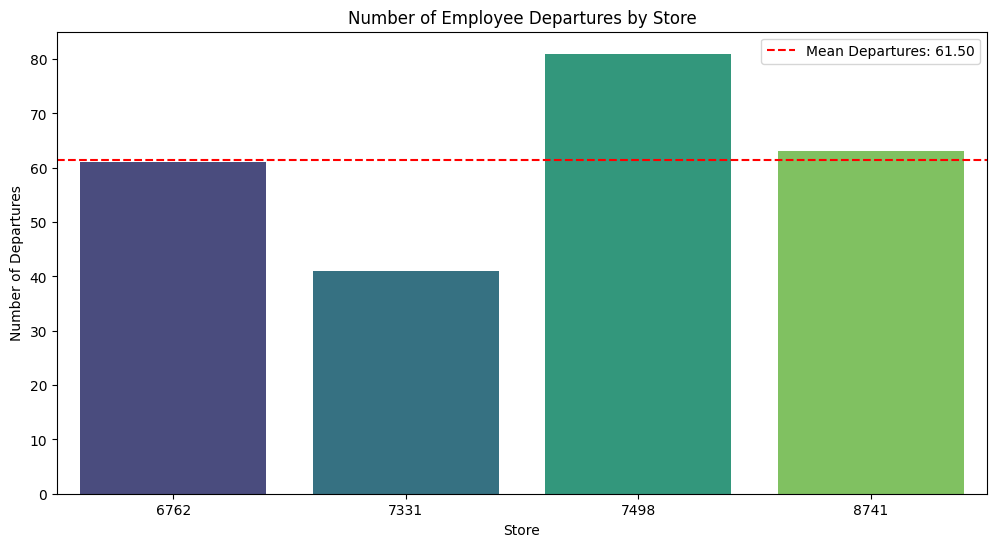

In [60]:
# Merge employee_last_month with schedule_df to get store information
employee_last_month_with_store = pd.merge(
    employee_last_month,
    schedule_df[['employee id', 'store']].drop_duplicates(),
    on='employee id',
    how='left'
)

# Display the result
print(employee_last_month_with_store.head())

# Count the number of departures by store
store_departures = employee_last_month_with_store.groupby('store').size().reset_index(name='num_departures')

# Display the result
print(store_departures)

# Calculate the mean number of departures across all stores
mean_departures = store_departures['num_departures'].mean()

# Classify stores as high or low departures
store_departures['departure_status'] = np.where(
    store_departures['num_departures'] > mean_departures,
    'High Departures',
    'Low Departures'
)

# Display the result
print(store_departures)


plt.figure(figsize=(12, 6))
sns.barplot(data=store_departures, x='store', y='num_departures', palette='viridis')
plt.axhline(y=mean_departures, color='red', linestyle='--', label=f'Mean Departures: {mean_departures:.2f}')
plt.title('Number of Employee Departures by Store')
plt.xlabel('Store')
plt.ylabel('Number of Departures')
plt.legend()
plt.show()

    employee id  last_month_worked  store
5         12009                  5   6762
9         14973                  1   6762
10        15645                  3   6762
13        16482                 10   6762
16    128145707                  8   7498
   store  num_departures
0   6762              27
1   7331              17
2   7498              38
3   8741              20
   store  num_departures departure_status
0   6762              27  High Departures
1   7331              17   Low Departures
2   7498              38  High Departures
3   8741              20   Low Departures


C:\Users\User\AppData\Local\Temp\ipykernel_14060\4220236062.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=store_departures_filtered, x='store', y='num_departures', palette='viridis')


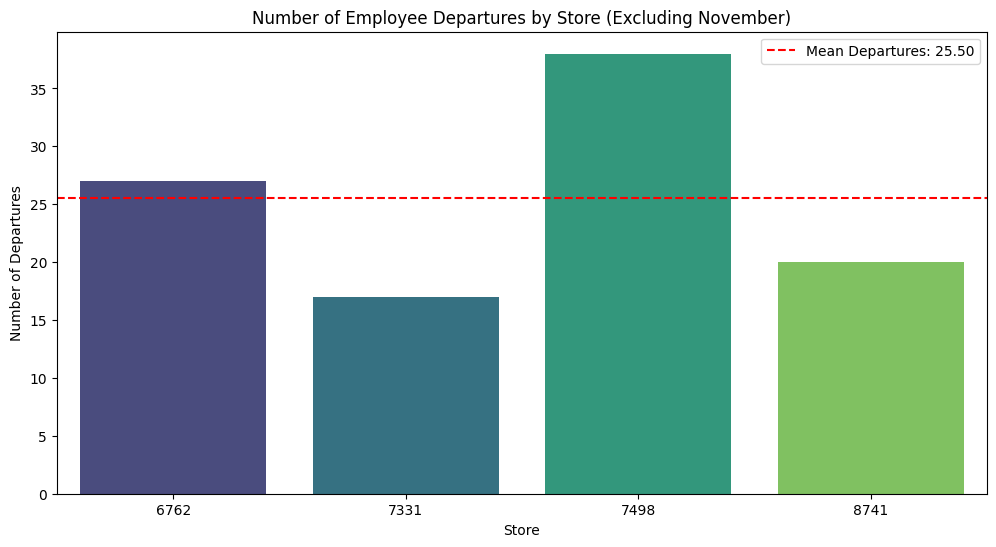

In [61]:
# Exclude employees who left in November (Month 11)
employee_last_month_with_store_filtered = employee_last_month_with_store[employee_last_month_with_store['last_month_worked'] != 11]

# Display the result
print(employee_last_month_with_store_filtered.head())

# Count the number of departures by store (excluding November)
store_departures_filtered = employee_last_month_with_store_filtered.groupby('store').size().reset_index(name='num_departures')

# Display the result
print(store_departures_filtered)
# Calculate the mean number of departures across all stores (excluding November)
mean_departures_filtered = store_departures_filtered['num_departures'].mean()

# Classify stores as high or low departures
store_departures_filtered['departure_status'] = np.where(
    store_departures_filtered['num_departures'] > mean_departures_filtered,
    'High Departures',
    'Low Departures'
)

# Display the result
print(store_departures_filtered)
plt.figure(figsize=(12, 6))
sns.barplot(data=store_departures_filtered, x='store', y='num_departures', palette='viridis')
plt.axhline(y=mean_departures_filtered, color='red', linestyle='--', label=f'Mean Departures: {mean_departures_filtered:.2f}')
plt.title('Number of Employee Departures by Store (Excluding November)')
plt.xlabel('Store')
plt.ylabel('Number of Departures')
plt.legend()
plt.show()